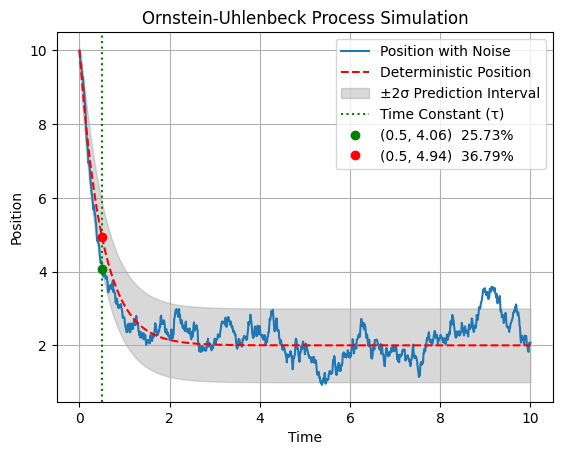

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import typing
np.random.seed(42)

theta = 2
mu = 2
T = 10
N = 1001
t = np.linspace(0, T, N)
dt = t[1] - t[0]
x0 = 10
sigma = 1
x = np.zeros_like(t)
x[0] = x0

# Simulating the Ornstein-Uhlenbeck process
for i in range(1, len(t)):
    dx = -theta*(x[i - 1] - mu)*dt + sigma * np.sqrt(dt) * np.random.normal(0,1)
    x[i] = x[i - 1] + dx

# Plotting the deterministic solution
x_det = mu + (x0 - mu) * np.exp(-theta * t)

# Calculating the standard deviation for the noise
var = sigma**2 / (2 * (-theta)) * (np.exp(2 * (-theta) * t) - 1)
std = np.sqrt(var)

# Plotting the results
plt.plot(t, x, label='Position with Noise')
plt.plot(t, x_det, label='Deterministic Position', linestyle='--', color='red')
plt.fill_between(t, x_det-2*std, x_det+2*std, color='gray', alpha=0.3, label='±2σ Prediction Interval')

# plot the one time constant
tau = 1/theta   # tau = 0.5
tauidx = int(tau / dt)  # tauidx = 50
plt.axvline(t[tauidx], color='green', linestyle=':', label='Time Constant (τ)')
plt.plot(t[tauidx], x[tauidx], 'go', label=f'({t[tauidx]}, {x[tauidx]:.2f})  {(x[tauidx] - mu)/(x0 - mu)*100:.2f}%')
plt.plot(t[tauidx], x_det[tauidx], 'ro', label=f'({t[tauidx]}, {x_det[tauidx]:.2f})  {(x_det[tauidx] - mu)/(x0 - mu)*100:.2f}%')

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Ornstein-Uhlenbeck Process Simulation')
plt.grid()
plt.legend()
plt.savefig('OU_process.pdf')
plt.show()